#  Date Fruit Classification

 This notebook will:
 - Explore the Date Fruit dataset using plots
 - Preprocess the data (encoding, scaling)
 - Select features
 - Train and evaluate multiple models
 - Compare performance

### Imports

In [3]:
%matplotlib inline

import plotly.io as pio
pio.renderers.default = "svg"


In [4]:
import sys
sys.path.append('../src')

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import model
from model import train_and_evaluate
import importlib

importlib.reload(model)


<module 'model' from 'c:\\Users\\Rubah\\OneDrive\\سطح المكتب\\MLmodels\\notebooks\\../src\\model.py'>

### Load the dataset


In [6]:
file_path = r"C:\Users\Rubah\OneDrive\سطح المكتب\MLmodels\data\Date_Fruit_Datasets.xlsx"
data = pd.read_excel(file_path)


In [7]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


###  Dataset Info
The dataset contains 898 samples and 34 numeric features describing shape, color, texture, etc.
Target variable: `Class` (type of date fruit).

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [9]:
data.shape

(898, 35)

### Explore the target

In [10]:
class_counts = data['Class'].value_counts()
class_counts


Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

### Feature correlation
We can visualize correlations between features to detect redundant features.

In [11]:
numeric_features = data.drop('Class', axis=1)
corr_matrix = numeric_features.corr()


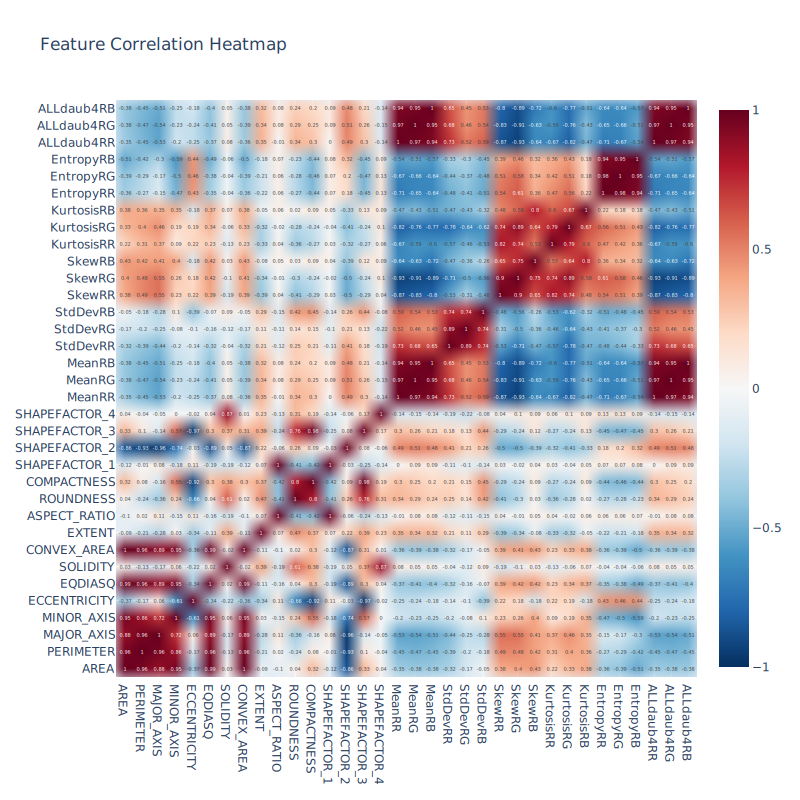

In [12]:
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu_r',
    zmin=-1,
    zmax=1,
    text=corr_matrix.round(2).values,
    texttemplate='%{text}'
))
fig.update_layout(title='Feature Correlation Heatmap', width=800, height=800)
fig.show()

### Preprocessing
- Encode the target labels
- Scale numeric features

In [13]:
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [14]:
X = data.drop('Class', axis=1)
y = data['Class']

In [15]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Train models
We use our reusable `train_and_evaluate` function to train and test:

Training Logistic Regression...


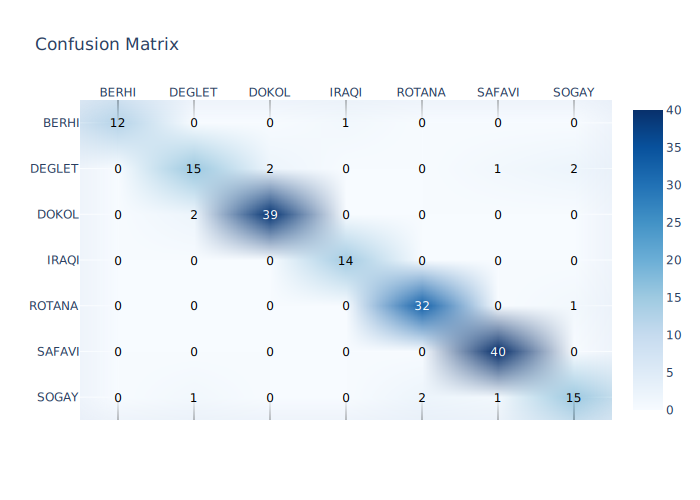

Training Random Forest...


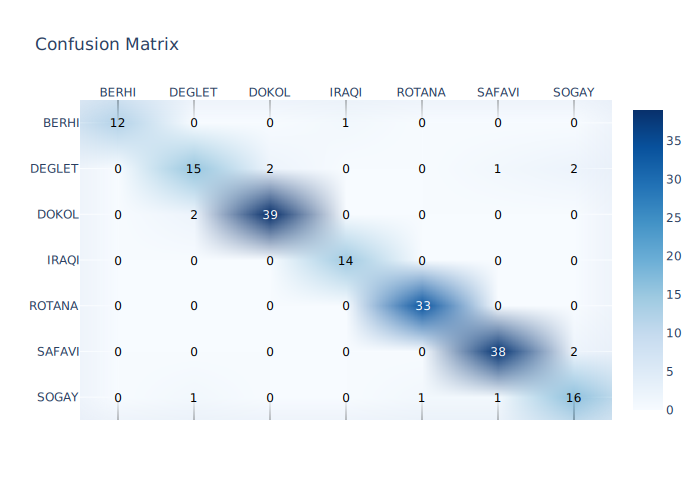

Training SVM...


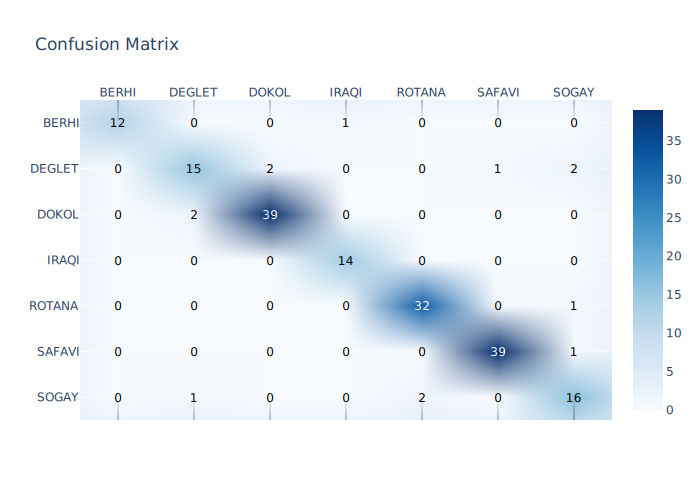

In [16]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

metrics_results = {}

label_ids = list(range(len(le.classes_)))
label_names = list(le.classes_)

for name, m in models.items():
    print(f"Training {name}...")
    metrics_results[name] = train_and_evaluate(
        m,
        X_scaled,
        y,
        task="classification",
        labels=label_ids,
        class_names=label_names,
        plot=True
    )



In [17]:
metrics = pd.DataFrame(metrics_results)

In [18]:
metrics

,Logistic Regression,Random Forest,SVM
Accuracy,0.927778,0.927778,0.927778
Precision,0.926226,0.927571,0.927734
Recall,0.927778,0.927778,0.927778
F1 Score,0.926327,0.927133,0.927216


In [19]:
import os
from joblib import dump

os.makedirs("models", exist_ok=True)

best_model_name = 'Random Forest'
best_model = models[best_model_name]
best_model_name = 'Random Forest_Dates'
model_path = f"models/{best_model_name.replace(' ', '_')}.joblib"
dump(best_model, model_path)

print(f"Saved {best_model_name} as '{model_path}'")



Saved Random Forest_Dates as 'models/Random_Forest_Dates.joblib'
